In [1]:
import pandas as pd
from spark_session import LocalSparkSession
from dataset import Dataset
from mr_id3 import MapReduceIDR3
from pyspark.mllib.tree import DecisionTree

In [2]:
from log import log
from sklearn.impute import SimpleImputer
from pyspark.sql.functions import lit
from pyspark.sql.functions import col, sum
from pyspark.sql.functions import udf, col
from pyspark.sql.types import IntegerType
from pyspark.sql import SparkSession
from pyspark import SparkContext
from pyspark.mllib.tree import DecisionTree, DecisionTreeModel
from pyspark.mllib.util import MLUtils
from pyspark.mllib.regression import LabeledPoint
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, LongType
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler

In [3]:
%time
num_fields = [
    'age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
    'hours_per_week', ]

categorical_fields = [
    'workclass', 'education',
    'marital_status', 'occupation', 'relationship',
    'race', 'sex', 'native_country', ]

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.96 µs


In [4]:
%time
target = 'label'
filename = 'dataset/adult.data'

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.25 µs


In [5]:
%time
cores = list(range(1, 21))
multiply = [20, ]
metrics = []

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.2 µs


In [6]:
%time
for n_cores in cores:
    for m_factor in multiply:
        spark = LocalSparkSession(n_cores)
        spark.start()

        dataset = Dataset(spark.spark, filename, num_fields, categorical_fields, target)
        dataset.load()
        dataset.one_hot_encode_categorical_fields()
        dataset.multiply_dataset(m_factor)

        mr_id3 = MapReduceIDR3(dataset)
        mr_id3.set_labeled_point()
        mr_id3.split()
        mr_id3.train()
        mr_id3.predict()
        
        metric = mr_id3.get_metrics()
        metric['length_rows'] = dataset.df.count()
        metric['m_factor'] = m_factor
        metric['n_cores'] = n_cores
        metrics.append(metric)

        spark.stop()

CPU times: user 4 µs, sys: 2 µs, total: 6 µs
Wall time: 9.06 µs
22/10/14 13:48:31 WARN Utils: Your hostname, Mac-Pro-de-MARCELO.local resolves to a loopback address: 127.0.0.1; using 192.168.0.62 instead (on interface en2)
22/10/14 13:48:31 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/10/14 13:48:32 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/10/14 13:48:37 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


22/10/14 13:48:52 WARN DAGScheduler: Broadcasting large task binary with size 1147.2 KiB


22/10/14 13:48:57 WARN PythonUDFRunner: Detected deadlock while completing task 0.0 in stage 24 (TID 16): Attempting to kill Python Worker


22/10/14 13:48:58 WARN DAGScheduler: Broadcasting large task binary with size 1148.2 KiB


22/10/14 13:49:02 WARN DAGScheduler: Broadcasting large task binary with size 1148.2 KiB


22/10/14 13:50:08 WARN MemoryStore: Not enough space to cache rdd_279_20 in memory! (computed 13.5 MiB so far)
22/10/14 13:50:08 WARN BlockManager: Persisting block rdd_279_20 to disk instead.
22/10/14 13:50:09 WARN MemoryStore: Not enough space to cache rdd_279_20 in memory! (computed 13.5 MiB so far)


22/10/14 13:50:11 WARN MemoryStore: Not enough space to cache rdd_279_21 in memory! (computed 13.5 MiB so far)
22/10/14 13:50:11 WARN BlockManager: Persisting block rdd_279_21 to disk instead.
22/10/14 13:50:12 WARN MemoryStore: Not enough space to cache rdd_279_21 in memory! (computed 13.5 MiB so far)


22/10/14 13:50:15 WARN MemoryStore: Not enough space to cache rdd_279_22 in memory! (computed 13.5 MiB so far)
22/10/14 13:50:15 WARN BlockManager: Persisting block rdd_279_22 to disk instead.
22/10/14 13:50:16 WARN MemoryStore: Not enough space to cache rdd_279_22 in memory! (computed 13.5 MiB so far)


22/10/14 13:50:18 WARN MemoryStore: Not enough space to cache rdd_279_23 in memory! (computed 13.5 MiB so far)
22/10/14 13:50:18 WARN BlockManager: Persisting block rdd_279_23 to disk instead.
22/10/14 13:50:19 WARN MemoryStore: Not enough space to cache rdd_279_23 in memory! (computed 13.5 MiB so far)


22/10/14 13:50:22 WARN MemoryStore: Not enough space to cache rdd_279_24 in memory! (computed 13.5 MiB so far)
22/10/14 13:50:22 WARN BlockManager: Persisting block rdd_279_24 to disk instead.
22/10/14 13:50:23 WARN MemoryStore: Not enough space to cache rdd_279_24 in memory! (computed 13.5 MiB so far)


22/10/14 13:50:25 WARN MemoryStore: Not enough space to cache rdd_279_25 in memory! (computed 13.5 MiB so far)
22/10/14 13:50:25 WARN BlockManager: Persisting block rdd_279_25 to disk instead.
22/10/14 13:50:26 WARN MemoryStore: Not enough space to cache rdd_279_25 in memory! (computed 13.5 MiB so far)


22/10/14 13:50:29 WARN MemoryStore: Not enough space to cache rdd_279_26 in memory! (computed 13.5 MiB so far)
22/10/14 13:50:29 WARN BlockManager: Persisting block rdd_279_26 to disk instead.
22/10/14 13:50:31 WARN MemoryStore: Not enough space to cache rdd_279_26 in memory! (computed 13.5 MiB so far)


22/10/14 13:50:34 WARN MemoryStore: Not enough space to cache rdd_279_27 in memory! (computed 13.5 MiB so far)
22/10/14 13:50:34 WARN BlockManager: Persisting block rdd_279_27 to disk instead.
22/10/14 13:50:35 WARN MemoryStore: Not enough space to cache rdd_279_27 in memory! (computed 13.5 MiB so far)


22/10/14 13:50:37 WARN MemoryStore: Not enough space to cache rdd_279_28 in memory! (computed 13.5 MiB so far)
22/10/14 13:50:37 WARN BlockManager: Persisting block rdd_279_28 to disk instead.
22/10/14 13:50:38 WARN MemoryStore: Not enough space to cache rdd_279_28 in memory! (computed 13.5 MiB so far)


22/10/14 13:50:41 WARN MemoryStore: Not enough space to cache rdd_279_29 in memory! (computed 13.5 MiB so far)
22/10/14 13:50:41 WARN BlockManager: Persisting block rdd_279_29 to disk instead.
22/10/14 13:50:42 WARN MemoryStore: Not enough space to cache rdd_279_29 in memory! (computed 13.5 MiB so far)


22/10/14 13:50:44 WARN MemoryStore: Not enough space to cache rdd_279_30 in memory! (computed 13.5 MiB so far)
22/10/14 13:50:44 WARN BlockManager: Persisting block rdd_279_30 to disk instead.
22/10/14 13:50:45 WARN MemoryStore: Not enough space to cache rdd_279_30 in memory! (computed 13.5 MiB so far)


22/10/14 13:50:48 WARN MemoryStore: Not enough space to cache rdd_279_31 in memory! (computed 13.5 MiB so far)
22/10/14 13:50:48 WARN BlockManager: Persisting block rdd_279_31 to disk instead.
22/10/14 13:50:49 WARN MemoryStore: Not enough space to cache rdd_279_31 in memory! (computed 13.5 MiB so far)
22/10/14 13:50:49 WARN DAGScheduler: Broadcasting large task binary with size 1153.7 KiB


22/10/14 13:50:50 WARN MemoryStore: Not enough space to cache rdd_279_21 in memory! (computed 13.5 MiB so far)
22/10/14 13:50:50 WARN MemoryStore: Not enough space to cache rdd_279_22 in memory! (computed 13.5 MiB so far)


22/10/14 13:50:50 WARN MemoryStore: Not enough space to cache rdd_279_23 in memory! (computed 13.5 MiB so far)
22/10/14 13:50:50 WARN MemoryStore: Not enough space to cache rdd_279_24 in memory! (computed 13.5 MiB so far)
22/10/14 13:50:50 WARN MemoryStore: Not enough space to cache rdd_279_25 in memory! (computed 13.5 MiB so far)


22/10/14 13:50:50 WARN MemoryStore: Not enough space to cache rdd_279_26 in memory! (computed 13.5 MiB so far)
22/10/14 13:50:51 WARN MemoryStore: Not enough space to cache rdd_279_27 in memory! (computed 13.5 MiB so far)


22/10/14 13:50:51 WARN MemoryStore: Not enough space to cache rdd_279_28 in memory! (computed 13.5 MiB so far)
22/10/14 13:50:51 WARN MemoryStore: Not enough space to cache rdd_279_29 in memory! (computed 13.5 MiB so far)


22/10/14 13:50:51 WARN MemoryStore: Not enough space to cache rdd_279_30 in memory! (computed 13.5 MiB so far)
22/10/14 13:50:51 WARN MemoryStore: Not enough space to cache rdd_279_31 in memory! (computed 13.5 MiB so far)


22/10/14 13:50:52 WARN DAGScheduler: Broadcasting large task binary with size 1156.4 KiB


22/10/14 13:50:59 WARN DAGScheduler: Broadcasting large task binary with size 1157.2 KiB


22/10/14 13:51:03 WARN DAGScheduler: Broadcasting large task binary with size 1157.6 KiB


22/10/14 13:51:04 WARN DAGScheduler: Broadcasting large task binary with size 1158.7 KiB


22/10/14 13:51:05 WARN DAGScheduler: Broadcasting large task binary with size 1160.7 KiB


22/10/14 13:51:07 WARN DAGScheduler: Broadcasting large task binary with size 1162.5 KiB


22/10/14 13:52:57 WARN DAGScheduler: Broadcasting large task binary with size 1148.4 KiB


/Users/marcelovasconcellos/opt/anaconda3/lib/python3.9/site-packages/pyspark/sql/context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


22/10/14 13:54:36 WARN DAGScheduler: Broadcasting large task binary with size 1160.3 KiB


22/10/14 13:54:40 WARN DAGScheduler: Broadcasting large task binary with size 1172.3 KiB


22/10/14 13:56:41 WARN DAGScheduler: Broadcasting large task binary with size 1147.2 KiB


22/10/14 13:56:46 WARN PythonUDFRunner: Detected deadlock while completing task 0.0 in stage 24 (TID 16): Attempting to kill Python Worker
22/10/14 13:56:46 WARN DAGScheduler: Broadcasting large task binary with size 1148.2 KiB


22/10/14 13:56:49 WARN DAGScheduler: Broadcasting large task binary with size 1148.2 KiB


22/10/14 13:57:24 WARN MemoryStore: Not enough space to cache rdd_279_20 in memory! (computed 13.5 MiB so far)
22/10/14 13:57:24 WARN BlockManager: Persisting block rdd_279_20 to disk instead.


22/10/14 13:57:24 WARN MemoryStore: Not enough space to cache rdd_279_20 in memory! (computed 13.5 MiB so far)


22/10/14 13:57:26 WARN MemoryStore: Not enough space to cache rdd_279_22 in memory! (computed 6.0 MiB so far)
22/10/14 13:57:26 WARN BlockManager: Persisting block rdd_279_22 to disk instead.
22/10/14 13:57:26 WARN MemoryStore: Not enough space to cache rdd_279_21 in memory! (computed 9.0 MiB so far)
22/10/14 13:57:26 WARN BlockManager: Persisting block rdd_279_21 to disk instead.
22/10/14 13:57:28 WARN MemoryStore: Not enough space to cache rdd_279_21 in memory! (computed 13.5 MiB so far)


22/10/14 13:57:28 WARN MemoryStore: Not enough space to cache rdd_279_22 in memory! (computed 13.5 MiB so far)


22/10/14 13:57:30 WARN MemoryStore: Not enough space to cache rdd_279_23 in memory! (computed 9.0 MiB so far)
22/10/14 13:57:30 WARN BlockManager: Persisting block rdd_279_23 to disk instead.
22/10/14 13:57:30 WARN MemoryStore: Not enough space to cache rdd_279_24 in memory! (computed 6.0 MiB so far)
22/10/14 13:57:30 WARN BlockManager: Persisting block rdd_279_24 to disk instead.
22/10/14 13:57:31 WARN MemoryStore: Not enough space to cache rdd_279_23 in memory! (computed 13.5 MiB so far)


22/10/14 13:57:32 WARN MemoryStore: Not enough space to cache rdd_279_24 in memory! (computed 13.5 MiB so far)


22/10/14 13:57:33 WARN MemoryStore: Not enough space to cache rdd_279_25 in memory! (computed 9.0 MiB so far)
22/10/14 13:57:33 WARN BlockManager: Persisting block rdd_279_25 to disk instead.
22/10/14 13:57:34 WARN MemoryStore: Not enough space to cache rdd_279_26 in memory! (computed 13.5 MiB so far)
22/10/14 13:57:34 WARN BlockManager: Persisting block rdd_279_26 to disk instead.
22/10/14 13:57:35 WARN MemoryStore: Not enough space to cache rdd_279_25 in memory! (computed 13.5 MiB so far)


22/10/14 13:57:35 WARN MemoryStore: Not enough space to cache rdd_279_26 in memory! (computed 13.5 MiB so far)


22/10/14 13:57:37 WARN MemoryStore: Not enough space to cache rdd_279_27 in memory! (computed 9.0 MiB so far)
22/10/14 13:57:37 WARN BlockManager: Persisting block rdd_279_27 to disk instead.
22/10/14 13:57:38 WARN MemoryStore: Not enough space to cache rdd_279_28 in memory! (computed 13.5 MiB so far)
22/10/14 13:57:38 WARN BlockManager: Persisting block rdd_279_28 to disk instead.
22/10/14 13:57:39 WARN MemoryStore: Not enough space to cache rdd_279_27 in memory! (computed 13.5 MiB so far)
22/10/14 13:57:39 WARN MemoryStore: Not enough space to cache rdd_279_28 in memory! (computed 13.5 MiB so far)


22/10/14 13:57:40 WARN MemoryStore: Not enough space to cache rdd_279_29 in memory! (computed 9.0 MiB so far)
22/10/14 13:57:40 WARN BlockManager: Persisting block rdd_279_29 to disk instead.
22/10/14 13:57:41 WARN MemoryStore: Not enough space to cache rdd_279_30 in memory! (computed 13.5 MiB so far)
22/10/14 13:57:41 WARN BlockManager: Persisting block rdd_279_30 to disk instead.
22/10/14 13:57:42 WARN MemoryStore: Not enough space to cache rdd_279_29 in memory! (computed 13.5 MiB so far)
22/10/14 13:57:42 WARN MemoryStore: Not enough space to cache rdd_279_30 in memory! (computed 13.5 MiB so far)


22/10/14 13:57:45 WARN DAGScheduler: Broadcasting large task binary with size 1153.6 KiB
22/10/14 13:57:46 WARN MemoryStore: Not enough space to cache rdd_279_20 in memory! (computed 6.0 MiB so far)
22/10/14 13:57:46 WARN MemoryStore: Not enough space to cache rdd_279_21 in memory! (computed 6.0 MiB so far)
22/10/14 13:57:46 WARN MemoryStore: Not enough space to cache rdd_279_23 in memory! (computed 6.0 MiB so far)
22/10/14 13:57:46 WARN MemoryStore: Not enough space to cache rdd_279_22 in memory! (computed 6.0 MiB so far)
22/10/14 13:57:46 WARN MemoryStore: Not enough space to cache rdd_279_24 in memory! (computed 6.0 MiB so far)
22/10/14 13:57:46 WARN MemoryStore: Not enough space to cache rdd_279_25 in memory! (computed 6.0 MiB so far)


22/10/14 13:57:46 WARN MemoryStore: Not enough space to cache rdd_279_27 in memory! (computed 6.0 MiB so far)
22/10/14 13:57:46 WARN MemoryStore: Not enough space to cache rdd_279_26 in memory! (computed 6.0 MiB so far)
22/10/14 13:57:46 WARN MemoryStore: Not enough space to cache rdd_279_29 in memory! (computed 6.0 MiB so far)
22/10/14 13:57:46 WARN MemoryStore: Not enough space to cache rdd_279_28 in memory! (computed 6.0 MiB so far)


22/10/14 13:57:46 WARN MemoryStore: Not enough space to cache rdd_279_30 in memory! (computed 9.0 MiB so far)


22/10/14 13:57:47 WARN DAGScheduler: Broadcasting large task binary with size 1156.4 KiB


22/10/14 13:57:49 WARN MemoryStore: Not enough space to cache rdd_279_20 in memory! (computed 9.0 MiB so far)


22/10/14 13:57:50 WARN MemoryStore: Not enough space to cache rdd_279_22 in memory! (computed 9.0 MiB so far)


22/10/14 13:57:50 WARN MemoryStore: Not enough space to cache rdd_279_24 in memory! (computed 9.0 MiB so far)


22/10/14 13:57:50 WARN MemoryStore: Not enough space to cache rdd_279_26 in memory! (computed 9.0 MiB so far)


22/10/14 13:57:51 WARN MemoryStore: Not enough space to cache rdd_279_28 in memory! (computed 9.0 MiB so far)


22/10/14 13:57:51 WARN MemoryStore: Not enough space to cache rdd_279_30 in memory! (computed 9.0 MiB so far)


22/10/14 13:57:51 WARN DAGScheduler: Broadcasting large task binary with size 1157.2 KiB


22/10/14 13:57:53 WARN DAGScheduler: Broadcasting large task binary with size 1157.6 KiB


22/10/14 13:57:54 WARN DAGScheduler: Broadcasting large task binary with size 1158.7 KiB


22/10/14 13:57:55 WARN DAGScheduler: Broadcasting large task binary with size 1160.7 KiB
22/10/14 13:57:56 WARN DAGScheduler: Broadcasting large task binary with size 1162.0 KiB


22/10/14 13:59:13 WARN DAGScheduler: Broadcasting large task binary with size 1148.4 KiB


22/10/14 14:00:05 WARN DAGScheduler: Broadcasting large task binary with size 1159.8 KiB


22/10/14 14:00:09 WARN DAGScheduler: Broadcasting large task binary with size 1171.8 KiB


22/10/14 14:01:36 WARN DAGScheduler: Broadcasting large task binary with size 1147.2 KiB


22/10/14 14:01:41 WARN PythonUDFRunner: Detected deadlock while completing task 0.0 in stage 24 (TID 16): Attempting to kill Python Worker
22/10/14 14:01:41 WARN DAGScheduler: Broadcasting large task binary with size 1148.2 KiB


22/10/14 14:01:44 WARN DAGScheduler: Broadcasting large task binary with size 1148.2 KiB


22/10/14 14:02:14 WARN MemoryStore: Not enough space to cache rdd_279_21 in memory! (computed 6.0 MiB so far)
22/10/14 14:02:14 WARN MemoryStore: Not enough space to cache rdd_279_20 in memory! (computed 9.0 MiB so far)
22/10/14 14:02:14 WARN BlockManager: Persisting block rdd_279_20 to disk instead.
22/10/14 14:02:14 WARN BlockManager: Persisting block rdd_279_21 to disk instead.
22/10/14 14:02:14 WARN MemoryStore: Not enough space to cache rdd_279_20 in memory! (computed 6.0 MiB so far)
22/10/14 14:02:15 WARN MemoryStore: Not enough space to cache rdd_279_21 in memory! (computed 6.0 MiB so far)


22/10/14 14:02:15 WARN MemoryStore: Not enough space to cache rdd_279_23 in memory! (computed 2.3 MiB so far)
22/10/14 14:02:15 WARN BlockManager: Persisting block rdd_279_23 to disk instead.
22/10/14 14:02:16 WARN MemoryStore: Not enough space to cache rdd_279_22 in memory! (computed 3.9 MiB so far)
22/10/14 14:02:16 WARN BlockManager: Persisting block rdd_279_22 to disk instead.
22/10/14 14:02:17 WARN MemoryStore: Not enough space to cache rdd_279_24 in memory! (computed 6.0 MiB so far)
22/10/14 14:02:17 WARN BlockManager: Persisting block rdd_279_24 to disk instead.
22/10/14 14:02:19 WARN MemoryStore: Not enough space to cache rdd_279_22 in memory! (computed 6.0 MiB so far)
22/10/14 14:02:19 WARN MemoryStore: Not enough space to cache rdd_279_23 in memory! (computed 6.0 MiB so far)


22/10/14 14:02:19 WARN MemoryStore: Not enough space to cache rdd_279_24 in memory! (computed 6.0 MiB so far)


22/10/14 14:02:20 WARN MemoryStore: Not enough space to cache rdd_279_26 in memory! (computed 2.3 MiB so far)
22/10/14 14:02:20 WARN BlockManager: Persisting block rdd_279_26 to disk instead.
22/10/14 14:02:20 WARN MemoryStore: Not enough space to cache rdd_279_25 in memory! (computed 3.9 MiB so far)
22/10/14 14:02:20 WARN BlockManager: Persisting block rdd_279_25 to disk instead.
22/10/14 14:02:22 WARN MemoryStore: Not enough space to cache rdd_279_27 in memory! (computed 6.0 MiB so far)
22/10/14 14:02:22 WARN BlockManager: Persisting block rdd_279_27 to disk instead.
22/10/14 14:02:23 WARN MemoryStore: Not enough space to cache rdd_279_25 in memory! (computed 6.0 MiB so far)


22/10/14 14:02:24 WARN MemoryStore: Not enough space to cache rdd_279_27 in memory! (computed 6.0 MiB so far)


22/10/14 14:02:24 WARN MemoryStore: Not enough space to cache rdd_279_29 in memory! (computed 2.3 MiB so far)
22/10/14 14:02:24 WARN BlockManager: Persisting block rdd_279_29 to disk instead.
22/10/14 14:02:25 WARN MemoryStore: Not enough space to cache rdd_279_28 in memory! (computed 3.9 MiB so far)
22/10/14 14:02:25 WARN BlockManager: Persisting block rdd_279_28 to disk instead.
22/10/14 14:02:26 WARN MemoryStore: Not enough space to cache rdd_279_30 in memory! (computed 6.0 MiB so far)
22/10/14 14:02:26 WARN BlockManager: Persisting block rdd_279_30 to disk instead.
22/10/14 14:02:28 WARN MemoryStore: Not enough space to cache rdd_279_28 in memory! (computed 6.0 MiB so far)


22/10/14 14:02:28 WARN MemoryStore: Not enough space to cache rdd_279_29 in memory! (computed 6.0 MiB so far)
22/10/14 14:02:28 WARN MemoryStore: Not enough space to cache rdd_279_30 in memory! (computed 13.5 MiB so far)


22/10/14 14:02:31 WARN DAGScheduler: Broadcasting large task binary with size 1153.7 KiB
22/10/14 14:02:31 WARN MemoryStore: Not enough space to cache rdd_279_0 in memory! (computed 9.0 MiB so far)
22/10/14 14:02:32 WARN MemoryStore: Not enough space to cache rdd_279_22 in memory! (computed 1048.2 KiB so far)
22/10/14 14:02:32 WARN MemoryStore: Not enough space to cache rdd_279_20 in memory! (computed 6.0 MiB so far)
22/10/14 14:02:32 WARN MemoryStore: Not enough space to cache rdd_279_21 in memory! (computed 6.0 MiB so far)
22/10/14 14:02:32 WARN MemoryStore: Not enough space to cache rdd_279_24 in memory! (computed 3.9 MiB so far)
22/10/14 14:02:32 WARN MemoryStore: Not enough space to cache rdd_279_23 in memory! (computed 6.0 MiB so far)
22/10/14 14:02:32 WARN MemoryStore: Not enough space to cache rdd_279_25 in memory! (computed 3.9 MiB so far)


22/10/14 14:02:32 WARN MemoryStore: Not enough space to cache rdd_279_27 in memory! (computed 6.0 MiB so far)
22/10/14 14:02:32 WARN MemoryStore: Not enough space to cache rdd_279_28 in memory! (computed 6.0 MiB so far)
22/10/14 14:02:32 WARN MemoryStore: Not enough space to cache rdd_279_29 in memory! (computed 9.0 MiB so far)
22/10/14 14:02:32 WARN MemoryStore: Not enough space to cache rdd_279_30 in memory! (computed 9.0 MiB so far)


22/10/14 14:02:32 WARN DAGScheduler: Broadcasting large task binary with size 1156.4 KiB
22/10/14 14:02:33 WARN MemoryStore: Not enough space to cache rdd_279_0 in memory! (computed 3.9 MiB so far)


22/10/14 14:02:33 WARN MemoryStore: Not enough space to cache rdd_279_7 in memory! (computed 13.5 MiB so far)


22/10/14 14:02:36 WARN DAGScheduler: Broadcasting large task binary with size 1157.2 KiB


22/10/14 14:02:38 WARN DAGScheduler: Broadcasting large task binary with size 1157.6 KiB


22/10/14 14:02:39 WARN DAGScheduler: Broadcasting large task binary with size 1158.7 KiB


22/10/14 14:02:39 WARN DAGScheduler: Broadcasting large task binary with size 1160.7 KiB


22/10/14 14:02:40 WARN DAGScheduler: Broadcasting large task binary with size 1162.5 KiB


22/10/14 14:03:58 WARN DAGScheduler: Broadcasting large task binary with size 1148.4 KiB


22/10/14 14:04:40 WARN DAGScheduler: Broadcasting large task binary with size 1160.3 KiB


22/10/14 14:04:44 WARN DAGScheduler: Broadcasting large task binary with size 1172.3 KiB


22/10/14 14:06:13 WARN DAGScheduler: Broadcasting large task binary with size 1147.2 KiB


22/10/14 14:06:18 WARN PythonUDFRunner: Detected deadlock while completing task 0.0 in stage 24 (TID 16): Attempting to kill Python Worker
22/10/14 14:06:18 WARN DAGScheduler: Broadcasting large task binary with size 1148.2 KiB


22/10/14 14:06:21 WARN DAGScheduler: Broadcasting large task binary with size 1148.2 KiB


22/10/14 14:06:49 WARN MemoryStore: Not enough space to cache rdd_279_19 in memory! (computed 20.5 MiB so far)
22/10/14 14:06:49 WARN MemoryStore: Not enough space to cache rdd_279_20 in memory! (computed 13.5 MiB so far)
22/10/14 14:06:49 WARN BlockManager: Persisting block rdd_279_19 to disk instead.
22/10/14 14:06:49 WARN BlockManager: Persisting block rdd_279_20 to disk instead.


22/10/14 14:06:50 WARN MemoryStore: Not enough space to cache rdd_279_20 in memory! (computed 6.0 MiB so far)


22/10/14 14:06:52 WARN MemoryStore: Not enough space to cache rdd_279_24 in memory! (computed 3.9 MiB so far)
22/10/14 14:06:52 WARN BlockManager: Persisting block rdd_279_24 to disk instead.
22/10/14 14:06:55 WARN MemoryStore: Not enough space to cache rdd_279_23 in memory! (computed 13.5 MiB so far)
22/10/14 14:06:55 WARN BlockManager: Persisting block rdd_279_23 to disk instead.


22/10/14 14:06:56 WARN MemoryStore: Not enough space to cache rdd_279_23 in memory! (computed 9.0 MiB so far)


22/10/14 14:06:56 WARN MemoryStore: Not enough space to cache rdd_279_24 in memory! (computed 6.0 MiB so far)


22/10/14 14:07:00 WARN MemoryStore: Not enough space to cache rdd_279_25 in memory! (computed 13.5 MiB so far)
22/10/14 14:07:00 WARN BlockManager: Persisting block rdd_279_25 to disk instead.
22/10/14 14:07:01 WARN MemoryStore: Not enough space to cache rdd_279_28 in memory! (computed 13.5 MiB so far)
22/10/14 14:07:01 WARN BlockManager: Persisting block rdd_279_28 to disk instead.
22/10/14 14:07:02 WARN MemoryStore: Not enough space to cache rdd_279_25 in memory! (computed 13.5 MiB so far)


22/10/14 14:07:02 WARN MemoryStore: Not enough space to cache rdd_279_28 in memory! (computed 6.0 MiB so far)


22/10/14 14:07:04 WARN MemoryStore: Not enough space to cache rdd_279_31 in memory! (computed 9.0 MiB so far)
22/10/14 14:07:04 WARN BlockManager: Persisting block rdd_279_31 to disk instead.
22/10/14 14:07:05 WARN MemoryStore: Not enough space to cache rdd_279_30 in memory! (computed 13.5 MiB so far)
22/10/14 14:07:05 WARN BlockManager: Persisting block rdd_279_30 to disk instead.


22/10/14 14:07:06 WARN MemoryStore: Not enough space to cache rdd_279_31 in memory! (computed 6.0 MiB so far)
22/10/14 14:07:06 WARN DAGScheduler: Broadcasting large task binary with size 1153.6 KiB
22/10/14 14:07:06 WARN MemoryStore: Not enough space to cache rdd_279_3 in memory! (computed 2.3 MiB so far)
22/10/14 14:07:06 WARN MemoryStore: Not enough space to cache rdd_279_0 in memory! (computed 2.3 MiB so far)
22/10/14 14:07:06 WARN MemoryStore: Not enough space to cache rdd_279_2 in memory! (computed 3.9 MiB so far)
22/10/14 14:07:06 WARN MemoryStore: Not enough space to cache rdd_279_1 in memory! (computed 3.9 MiB so far)
22/10/14 14:07:07 WARN MemoryStore: Not enough space to cache rdd_279_4 in memory! (computed 9.0 MiB so far)


22/10/14 14:07:07 WARN MemoryStore: Not enough space to cache rdd_279_20 in memory! (computed 9.0 MiB so far)
22/10/14 14:07:07 WARN MemoryStore: Not enough space to cache rdd_279_23 in memory! (computed 6.0 MiB so far)
22/10/14 14:07:07 WARN MemoryStore: Not enough space to cache rdd_279_24 in memory! (computed 6.0 MiB so far)
22/10/14 14:07:07 WARN MemoryStore: Not enough space to cache rdd_279_25 in memory! (computed 1048.2 KiB so far)


22/10/14 14:07:07 WARN MemoryStore: Not enough space to cache rdd_279_28 in memory! (computed 9.0 MiB so far)
22/10/14 14:07:07 WARN MemoryStore: Not enough space to cache rdd_279_31 in memory! (computed 9.0 MiB so far)


22/10/14 14:07:07 WARN DAGScheduler: Broadcasting large task binary with size 1156.4 KiB
22/10/14 14:07:07 WARN MemoryStore: Not enough space to cache rdd_279_2 in memory! (computed 2.3 MiB so far)
22/10/14 14:07:08 WARN MemoryStore: Not enough space to cache rdd_279_1 in memory! (computed 9.0 MiB so far)
22/10/14 14:07:08 WARN MemoryStore: Not enough space to cache rdd_279_3 in memory! (computed 9.0 MiB so far)
22/10/14 14:07:08 WARN MemoryStore: Not enough space to cache rdd_279_0 in memory! (computed 9.0 MiB so far)


22/10/14 14:07:08 WARN MemoryStore: Not enough space to cache rdd_279_5 in memory! (computed 13.5 MiB so far)


22/10/14 14:07:10 WARN MemoryStore: Not enough space to cache rdd_279_25 in memory! (computed 9.0 MiB so far)


22/10/14 14:07:11 WARN DAGScheduler: Broadcasting large task binary with size 1157.2 KiB


22/10/14 14:07:13 WARN DAGScheduler: Broadcasting large task binary with size 1157.6 KiB
22/10/14 14:07:14 WARN DAGScheduler: Broadcasting large task binary with size 1158.7 KiB
22/10/14 14:07:14 WARN DAGScheduler: Broadcasting large task binary with size 1160.7 KiB
22/10/14 14:07:15 WARN DAGScheduler: Broadcasting large task binary with size 1162.9 KiB


22/10/14 14:08:34 WARN DAGScheduler: Broadcasting large task binary with size 1148.4 KiB


22/10/14 14:09:12 WARN DAGScheduler: Broadcasting large task binary with size 1160.7 KiB


22/10/14 14:09:16 WARN DAGScheduler: Broadcasting large task binary with size 1172.7 KiB


22/10/14 14:10:44 WARN DAGScheduler: Broadcasting large task binary with size 1147.2 KiB


22/10/14 14:10:49 WARN PythonUDFRunner: Detected deadlock while completing task 0.0 in stage 24 (TID 16): Attempting to kill Python Worker
22/10/14 14:10:49 WARN DAGScheduler: Broadcasting large task binary with size 1148.2 KiB


22/10/14 14:10:53 WARN DAGScheduler: Broadcasting large task binary with size 1148.2 KiB


22/10/14 14:11:20 WARN MemoryStore: Not enough space to cache rdd_279_20 in memory! (computed 13.5 MiB so far)
22/10/14 14:11:20 WARN MemoryStore: Not enough space to cache rdd_279_18 in memory! (computed 13.5 MiB so far)
22/10/14 14:11:20 WARN BlockManager: Persisting block rdd_279_18 to disk instead.
22/10/14 14:11:20 WARN BlockManager: Persisting block rdd_279_20 to disk instead.


22/10/14 14:11:21 WARN MemoryStore: Not enough space to cache rdd_279_18 in memory! (computed 13.5 MiB so far)


22/10/14 14:11:25 WARN MemoryStore: Not enough space to cache rdd_279_21 in memory! (computed 6.0 MiB so far)
22/10/14 14:11:25 WARN BlockManager: Persisting block rdd_279_21 to disk instead.
22/10/14 14:11:25 WARN MemoryStore: Not enough space to cache rdd_279_25 in memory! (computed 6.0 MiB so far)
22/10/14 14:11:25 WARN BlockManager: Persisting block rdd_279_25 to disk instead.
22/10/14 14:11:25 WARN MemoryStore: Not enough space to cache rdd_279_23 in memory! (computed 9.0 MiB so far)
22/10/14 14:11:25 WARN BlockManager: Persisting block rdd_279_23 to disk instead.


22/10/14 14:11:29 WARN MemoryStore: Not enough space to cache rdd_279_25 in memory! (computed 13.5 MiB so far)
22/10/14 14:11:29 WARN MemoryStore: Not enough space to cache rdd_279_23 in memory! (computed 13.5 MiB so far)


22/10/14 14:11:32 WARN MemoryStore: Not enough space to cache rdd_279_26 in memory! (computed 6.0 MiB so far)
22/10/14 14:11:32 WARN BlockManager: Persisting block rdd_279_26 to disk instead.
22/10/14 14:11:33 WARN MemoryStore: Not enough space to cache rdd_279_27 in memory! (computed 9.0 MiB so far)
22/10/14 14:11:33 WARN BlockManager: Persisting block rdd_279_27 to disk instead.
22/10/14 14:11:33 WARN MemoryStore: Not enough space to cache rdd_279_30 in memory! (computed 9.0 MiB so far)
22/10/14 14:11:33 WARN BlockManager: Persisting block rdd_279_30 to disk instead.
22/10/14 14:11:36 WARN MemoryStore: Not enough space to cache rdd_279_26 in memory! (computed 9.0 MiB so far)


22/10/14 14:11:37 WARN MemoryStore: Not enough space to cache rdd_279_30 in memory! (computed 1585.4 KiB so far)
22/10/14 14:11:37 WARN MemoryStore: Not enough space to cache rdd_279_27 in memory! (computed 13.5 MiB so far)


22/10/14 14:11:40 WARN DAGScheduler: Broadcasting large task binary with size 1153.7 KiB
22/10/14 14:11:40 WARN MemoryStore: Not enough space to cache rdd_279_3 in memory! (computed 2.3 MiB so far)
22/10/14 14:11:40 WARN MemoryStore: Not enough space to cache rdd_279_1 in memory! (computed 2.3 MiB so far)
22/10/14 14:11:40 WARN MemoryStore: Not enough space to cache rdd_279_4 in memory! (computed 3.9 MiB so far)
22/10/14 14:11:40 WARN MemoryStore: Not enough space to cache rdd_279_0 in memory! (computed 3.9 MiB so far)
22/10/14 14:11:40 WARN MemoryStore: Not enough space to cache rdd_279_5 in memory! (computed 13.5 MiB so far)
22/10/14 14:11:40 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_279_23 in memory.
22/10/14 14:11:40 WARN MemoryStore: Not enough space to cache rdd_279_23 in memory! (computed 384.0 B so far)
22/10/14 14:11:40 WARN MemoryStore: Not enough space to cache rdd_279_18 in memory! (computed 13.5 MiB so far)
22/10/14 

22/10/14 14:11:41 WARN MemoryStore: Not enough space to cache rdd_279_30 in memory! (computed 13.5 MiB so far)
22/10/14 14:11:41 WARN DAGScheduler: Broadcasting large task binary with size 1156.4 KiB


22/10/14 14:11:41 WARN MemoryStore: Not enough space to cache rdd_279_3 in memory! (computed 2.3 MiB so far)
22/10/14 14:11:41 WARN MemoryStore: Not enough space to cache rdd_279_1 in memory! (computed 13.5 MiB so far)
22/10/14 14:11:41 WARN MemoryStore: Not enough space to cache rdd_279_4 in memory! (computed 13.5 MiB so far)
22/10/14 14:11:41 WARN MemoryStore: Not enough space to cache rdd_279_0 in memory! (computed 9.0 MiB so far)


22/10/14 14:11:43 WARN MemoryStore: Not enough space to cache rdd_279_15 in memory! (computed 13.5 MiB so far)
22/10/14 14:11:43 WARN MemoryStore: Not enough space to cache rdd_279_19 in memory! (computed 13.5 MiB so far)


22/10/14 14:11:43 WARN MemoryStore: Not enough space to cache rdd_279_23 in memory! (computed 13.5 MiB so far)


22/10/14 14:11:44 WARN MemoryStore: Not enough space to cache rdd_279_29 in memory! (computed 9.0 MiB so far)
22/10/14 14:11:44 WARN MemoryStore: Not enough space to cache rdd_279_28 in memory! (computed 13.5 MiB so far)


22/10/14 14:11:45 WARN DAGScheduler: Broadcasting large task binary with size 1157.2 KiB


22/10/14 14:11:47 WARN DAGScheduler: Broadcasting large task binary with size 1157.6 KiB
22/10/14 14:11:47 WARN DAGScheduler: Broadcasting large task binary with size 1158.7 KiB
22/10/14 14:11:48 WARN DAGScheduler: Broadcasting large task binary with size 1160.7 KiB


22/10/14 14:11:49 WARN DAGScheduler: Broadcasting large task binary with size 1162.5 KiB


22/10/14 14:13:10 WARN DAGScheduler: Broadcasting large task binary with size 1148.4 KiB


22/10/14 14:13:50 WARN DAGScheduler: Broadcasting large task binary with size 1160.3 KiB


22/10/14 14:13:54 WARN DAGScheduler: Broadcasting large task binary with size 1172.3 KiB


22/10/14 14:15:23 WARN DAGScheduler: Broadcasting large task binary with size 1147.2 KiB


22/10/14 14:15:28 WARN PythonUDFRunner: Detected deadlock while completing task 0.0 in stage 24 (TID 16): Attempting to kill Python Worker
22/10/14 14:15:28 WARN DAGScheduler: Broadcasting large task binary with size 1148.2 KiB


22/10/14 14:15:31 WARN DAGScheduler: Broadcasting large task binary with size 1148.2 KiB


22/10/14 14:16:01 WARN MemoryStore: Not enough space to cache rdd_279_21 in memory! (computed 6.0 MiB so far)
22/10/14 14:16:01 WARN BlockManager: Persisting block rdd_279_21 to disk instead.
22/10/14 14:16:01 WARN MemoryStore: Not enough space to cache rdd_279_22 in memory! (computed 6.0 MiB so far)
22/10/14 14:16:01 WARN BlockManager: Persisting block rdd_279_22 to disk instead.
22/10/14 14:16:04 WARN MemoryStore: Not enough space to cache rdd_279_24 in memory! (computed 13.5 MiB so far)
22/10/14 14:16:04 WARN BlockManager: Persisting block rdd_279_24 to disk instead.
22/10/14 14:16:04 WARN MemoryStore: Not enough space to cache rdd_279_23 in memory! (computed 13.5 MiB so far)
22/10/14 14:16:04 WARN BlockManager: Persisting block rdd_279_23 to disk instead.


22/10/14 14:16:05 WARN MemoryStore: Not enough space to cache rdd_279_22 in memory! (computed 13.5 MiB so far)
22/10/14 14:16:05 WARN MemoryStore: Not enough space to cache rdd_279_21 in memory! (computed 13.5 MiB so far)


22/10/14 14:16:06 WARN MemoryStore: Not enough space to cache rdd_279_24 in memory! (computed 13.5 MiB so far)


22/10/14 14:16:09 WARN MemoryStore: Not enough space to cache rdd_279_27 in memory! (computed 6.0 MiB so far)
22/10/14 14:16:09 WARN BlockManager: Persisting block rdd_279_27 to disk instead.
22/10/14 14:16:10 WARN MemoryStore: Not enough space to cache rdd_279_28 in memory! (computed 9.0 MiB so far)
22/10/14 14:16:10 WARN BlockManager: Persisting block rdd_279_28 to disk instead.
22/10/14 14:16:12 WARN MemoryStore: Not enough space to cache rdd_279_26 in memory! (computed 13.5 MiB so far)
22/10/14 14:16:12 WARN BlockManager: Persisting block rdd_279_26 to disk instead.


22/10/14 14:16:14 WARN MemoryStore: Not enough space to cache rdd_279_28 in memory! (computed 1048.2 KiB so far)
22/10/14 14:16:14 WARN MemoryStore: Not enough space to cache rdd_279_27 in memory! (computed 13.5 MiB so far)


22/10/14 14:16:17 WARN DAGScheduler: Broadcasting large task binary with size 1153.7 KiB
22/10/14 14:16:17 WARN MemoryStore: Not enough space to cache rdd_279_3 in memory! (computed 1585.4 KiB so far)
22/10/14 14:16:17 WARN MemoryStore: Not enough space to cache rdd_279_5 in memory! (computed 1048.2 KiB so far)
22/10/14 14:16:17 WARN MemoryStore: Not enough space to cache rdd_279_1 in memory! (computed 2.3 MiB so far)
22/10/14 14:16:17 WARN MemoryStore: Not enough space to cache rdd_279_0 in memory! (computed 2.3 MiB so far)
22/10/14 14:16:17 WARN MemoryStore: Not enough space to cache rdd_279_4 in memory! (computed 2.3 MiB so far)
22/10/14 14:16:17 WARN MemoryStore: Not enough space to cache rdd_279_2 in memory! (computed 2.3 MiB so far)
22/10/14 14:16:17 WARN MemoryStore: Not enough space to cache rdd_279_21 in memory! (computed 6.0 MiB so far)
22/10/14 14:16:17 WARN MemoryStore: Not enough space to cache rdd_279_22 in memory! (computed 6.0 MiB so far)
22/10/14 14:16:17 WARN MemorySt

22/10/14 14:16:18 WARN DAGScheduler: Broadcasting large task binary with size 1156.4 KiB
22/10/14 14:16:18 WARN MemoryStore: Not enough space to cache rdd_279_0 in memory! (computed 1048.2 KiB so far)
22/10/14 14:16:18 WARN MemoryStore: Not enough space to cache rdd_279_1 in memory! (computed 1585.4 KiB so far)
22/10/14 14:16:18 WARN MemoryStore: Not enough space to cache rdd_279_5 in memory! (computed 6.0 MiB so far)
22/10/14 14:16:18 WARN MemoryStore: Not enough space to cache rdd_279_2 in memory! (computed 6.0 MiB so far)
22/10/14 14:16:18 WARN MemoryStore: Not enough space to cache rdd_279_3 in memory! (computed 9.0 MiB so far)


22/10/14 14:16:19 WARN MemoryStore: Not enough space to cache rdd_279_10 in memory! (computed 13.5 MiB so far)
22/10/14 14:16:19 WARN MemoryStore: Not enough space to cache rdd_279_9 in memory! (computed 13.5 MiB so far)


22/10/14 14:16:21 WARN MemoryStore: Not enough space to cache rdd_279_25 in memory! (computed 6.0 MiB so far)


22/10/14 14:16:22 WARN DAGScheduler: Broadcasting large task binary with size 1157.2 KiB


22/10/14 14:16:24 WARN DAGScheduler: Broadcasting large task binary with size 1157.6 KiB


22/10/14 14:16:24 WARN DAGScheduler: Broadcasting large task binary with size 1158.7 KiB
22/10/14 14:16:25 WARN DAGScheduler: Broadcasting large task binary with size 1160.5 KiB
22/10/14 14:16:25 WARN DAGScheduler: Broadcasting large task binary with size 1160.8 KiB


22/10/14 14:17:47 WARN DAGScheduler: Broadcasting large task binary with size 1148.4 KiB


22/10/14 14:18:25 WARN DAGScheduler: Broadcasting large task binary with size 1158.6 KiB


22/10/14 14:18:29 WARN DAGScheduler: Broadcasting large task binary with size 1170.6 KiB


22/10/14 14:19:58 WARN DAGScheduler: Broadcasting large task binary with size 1147.2 KiB


22/10/14 14:20:03 WARN PythonUDFRunner: Detected deadlock while completing task 0.0 in stage 24 (TID 16): Attempting to kill Python Worker
22/10/14 14:20:03 WARN DAGScheduler: Broadcasting large task binary with size 1148.2 KiB


22/10/14 14:20:06 WARN DAGScheduler: Broadcasting large task binary with size 1148.2 KiB


22/10/14 14:20:34 WARN MemoryStore: Not enough space to cache rdd_279_17 in memory! (computed 13.5 MiB so far)
22/10/14 14:20:34 WARN BlockManager: Persisting block rdd_279_17 to disk instead.
22/10/14 14:20:34 WARN MemoryStore: Not enough space to cache rdd_279_15 in memory! (computed 13.5 MiB so far)
22/10/14 14:20:34 WARN BlockManager: Persisting block rdd_279_15 to disk instead.
22/10/14 14:20:34 WARN MemoryStore: Not enough space to cache rdd_279_19 in memory! (computed 13.5 MiB so far)
22/10/14 14:20:34 WARN BlockManager: Persisting block rdd_279_19 to disk instead.
22/10/14 14:20:34 WARN MemoryStore: Not enough space to cache rdd_279_18 in memory! (computed 13.5 MiB so far)
22/10/14 14:20:34 WARN BlockManager: Persisting block rdd_279_18 to disk instead.


22/10/14 14:20:36 WARN MemoryStore: Not enough space to cache rdd_279_22 in memory! (computed 1048.2 KiB so far)
22/10/14 14:20:36 WARN BlockManager: Persisting block rdd_279_22 to disk instead.


22/10/14 14:20:41 WARN MemoryStore: Not enough space to cache rdd_279_23 in memory! (computed 9.0 MiB so far)
22/10/14 14:20:41 WARN BlockManager: Persisting block rdd_279_23 to disk instead.
22/10/14 14:20:42 WARN MemoryStore: Not enough space to cache rdd_279_26 in memory! (computed 9.0 MiB so far)
22/10/14 14:20:42 WARN BlockManager: Persisting block rdd_279_26 to disk instead.
22/10/14 14:20:42 WARN MemoryStore: Not enough space to cache rdd_279_28 in memory! (computed 9.0 MiB so far)
22/10/14 14:20:42 WARN BlockManager: Persisting block rdd_279_28 to disk instead.
22/10/14 14:20:44 WARN MemoryStore: Not enough space to cache rdd_279_22 in memory! (computed 9.0 MiB so far)


22/10/14 14:20:46 WARN MemoryStore: Not enough space to cache rdd_279_23 in memory! (computed 9.0 MiB so far)
22/10/14 14:20:47 WARN MemoryStore: Not enough space to cache rdd_279_26 in memory! (computed 3.9 MiB so far)
22/10/14 14:20:47 WARN MemoryStore: Not enough space to cache rdd_279_29 in memory! (computed 2.3 MiB so far)
22/10/14 14:20:47 WARN BlockManager: Persisting block rdd_279_29 to disk instead.
22/10/14 14:20:47 WARN MemoryStore: Not enough space to cache rdd_279_28 in memory! (computed 13.5 MiB so far)


22/10/14 14:20:49 WARN MemoryStore: Not enough space to cache rdd_279_30 in memory! (computed 9.0 MiB so far)
22/10/14 14:20:49 WARN BlockManager: Persisting block rdd_279_30 to disk instead.
22/10/14 14:20:50 WARN MemoryStore: Not enough space to cache rdd_279_29 in memory! (computed 6.0 MiB so far)


22/10/14 14:20:51 WARN MemoryStore: Not enough space to cache rdd_279_31 in memory! (computed 20.5 MiB so far)
22/10/14 14:20:51 WARN BlockManager: Persisting block rdd_279_31 to disk instead.
22/10/14 14:20:51 WARN MemoryStore: Not enough space to cache rdd_279_30 in memory! (computed 6.0 MiB so far)
22/10/14 14:20:51 WARN DAGScheduler: Broadcasting large task binary with size 1153.6 KiB


22/10/14 14:20:51 WARN MemoryStore: Not enough space to cache rdd_279_3 in memory! (computed 1585.4 KiB so far)
22/10/14 14:20:51 WARN MemoryStore: Not enough space to cache rdd_279_5 in memory! (computed 2.3 MiB so far)
22/10/14 14:20:51 WARN MemoryStore: Not enough space to cache rdd_279_2 in memory! (computed 3.9 MiB so far)
22/10/14 14:20:51 WARN MemoryStore: Not enough space to cache rdd_279_0 in memory! (computed 3.9 MiB so far)
22/10/14 14:20:51 WARN MemoryStore: Not enough space to cache rdd_279_6 in memory! (computed 1048.2 KiB so far)
22/10/14 14:20:52 WARN MemoryStore: Not enough space to cache rdd_279_22 in memory! (computed 9.0 MiB so far)
22/10/14 14:20:52 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_279_28 in memory.
22/10/14 14:20:52 WARN MemoryStore: Not enough space to cache rdd_279_28 in memory! (computed 384.0 B so far)
22/10/14 14:20:52 WARN MemoryStore: Not enough space to cache rdd_279_26 in memory! (computed 

22/10/14 14:20:52 WARN DAGScheduler: Broadcasting large task binary with size 1156.4 KiB
22/10/14 14:20:52 WARN MemoryStore: Not enough space to cache rdd_279_5 in memory! (computed 1048.2 KiB so far)
22/10/14 14:20:52 WARN MemoryStore: Not enough space to cache rdd_279_3 in memory! (computed 1585.4 KiB so far)
22/10/14 14:20:52 WARN MemoryStore: Not enough space to cache rdd_279_2 in memory! (computed 6.0 MiB so far)
22/10/14 14:20:52 WARN MemoryStore: Not enough space to cache rdd_279_0 in memory! (computed 13.5 MiB so far)


22/10/14 14:20:53 WARN MemoryStore: Not enough space to cache rdd_279_10 in memory! (computed 13.5 MiB so far)
22/10/14 14:20:53 WARN MemoryStore: Not enough space to cache rdd_279_11 in memory! (computed 13.5 MiB so far)


22/10/14 14:20:55 WARN MemoryStore: Not enough space to cache rdd_279_26 in memory! (computed 9.0 MiB so far)


22/10/14 14:20:56 WARN DAGScheduler: Broadcasting large task binary with size 1157.2 KiB


22/10/14 14:20:58 WARN DAGScheduler: Broadcasting large task binary with size 1157.6 KiB


22/10/14 14:20:58 WARN DAGScheduler: Broadcasting large task binary with size 1158.7 KiB
22/10/14 14:20:59 WARN DAGScheduler: Broadcasting large task binary with size 1160.7 KiB
22/10/14 14:20:59 WARN DAGScheduler: Broadcasting large task binary with size 1162.5 KiB


22/10/14 14:22:22 WARN DAGScheduler: Broadcasting large task binary with size 1148.4 KiB


22/10/14 14:23:01 WARN DAGScheduler: Broadcasting large task binary with size 1160.2 KiB


22/10/14 14:23:05 WARN DAGScheduler: Broadcasting large task binary with size 1172.3 KiB


22/10/14 14:24:35 WARN DAGScheduler: Broadcasting large task binary with size 1147.2 KiB


22/10/14 14:24:40 WARN PythonUDFRunner: Detected deadlock while completing task 0.0 in stage 24 (TID 16): Attempting to kill Python Worker
22/10/14 14:24:40 WARN DAGScheduler: Broadcasting large task binary with size 1148.2 KiB


22/10/14 14:24:44 WARN DAGScheduler: Broadcasting large task binary with size 1148.2 KiB


22/10/14 14:25:13 WARN MemoryStore: Not enough space to cache rdd_279_21 in memory! (computed 6.0 MiB so far)
22/10/14 14:25:13 WARN MemoryStore: Not enough space to cache rdd_279_19 in memory! (computed 6.0 MiB so far)
22/10/14 14:25:13 WARN MemoryStore: Not enough space to cache rdd_279_17 in memory! (computed 6.0 MiB so far)
22/10/14 14:25:13 WARN MemoryStore: Not enough space to cache rdd_279_18 in memory! (computed 6.0 MiB so far)
22/10/14 14:25:13 WARN BlockManager: Persisting block rdd_279_21 to disk instead.
22/10/14 14:25:13 WARN BlockManager: Persisting block rdd_279_19 to disk instead.
22/10/14 14:25:13 WARN BlockManager: Persisting block rdd_279_17 to disk instead.
22/10/14 14:25:13 WARN BlockManager: Persisting block rdd_279_18 to disk instead.
22/10/14 14:25:15 WARN MemoryStore: Not enough space to cache rdd_279_24 in memory! (computed 13.5 MiB so far)
22/10/14 14:25:15 WARN BlockManager: Persisting block rdd_279_24 to disk instead.


22/10/14 14:25:18 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_279_25 in memory.
22/10/14 14:25:18 WARN MemoryStore: Not enough space to cache rdd_279_24 in memory! (computed 6.0 MiB so far)
22/10/14 14:25:18 WARN MemoryStore: Not enough space to cache rdd_279_18 in memory! (computed 9.0 MiB so far)
22/10/14 14:25:18 WARN MemoryStore: Not enough space to cache rdd_279_21 in memory! (computed 13.5 MiB so far)


22/10/14 14:25:18 WARN MemoryStore: Not enough space to cache rdd_279_25 in memory! (computed 384.0 B so far)
22/10/14 14:25:18 WARN BlockManager: Persisting block rdd_279_25 to disk instead.
22/10/14 14:25:20 WARN MemoryStore: Not enough space to cache rdd_279_30 in memory! (computed 1048.2 KiB so far)
22/10/14 14:25:20 WARN MemoryStore: Not enough space to cache rdd_279_29 in memory! (computed 2.3 MiB so far)
22/10/14 14:25:20 WARN BlockManager: Persisting block rdd_279_30 to disk instead.
22/10/14 14:25:20 WARN BlockManager: Persisting block rdd_279_29 to disk instead.
22/10/14 14:25:21 WARN MemoryStore: Not enough space to cache rdd_279_26 in memory! (computed 3.9 MiB so far)
22/10/14 14:25:21 WARN BlockManager: Persisting block rdd_279_26 to disk instead.
22/10/14 14:25:21 WARN MemoryStore: Not enough space to cache rdd_279_27 in memory! (computed 3.9 MiB so far)
22/10/14 14:25:21 WARN BlockManager: Persisting block rdd_279_27 to disk instead.
22/10/14 14:25:23 WARN MemoryStore: N

22/10/14 14:25:28 WARN DAGScheduler: Broadcasting large task binary with size 1153.6 KiB
22/10/14 14:25:28 WARN MemoryStore: Not enough space to cache rdd_279_0 in memory! (computed 6.0 MiB so far)
22/10/14 14:25:28 WARN MemoryStore: Not enough space to cache rdd_279_4 in memory! (computed 3.9 MiB so far)
22/10/14 14:25:28 WARN MemoryStore: Not enough space to cache rdd_279_5 in memory! (computed 3.9 MiB so far)


22/10/14 14:25:29 WARN MemoryStore: Not enough space to cache rdd_279_18 in memory! (computed 9.0 MiB so far)
22/10/14 14:25:29 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_279_25 in memory.
22/10/14 14:25:29 WARN MemoryStore: Not enough space to cache rdd_279_25 in memory! (computed 384.0 B so far)
22/10/14 14:25:29 WARN MemoryStore: Not enough space to cache rdd_279_21 in memory! (computed 3.9 MiB so far)
22/10/14 14:25:29 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_279_26 in memory.
22/10/14 14:25:29 WARN MemoryStore: Not enough space to cache rdd_279_26 in memory! (computed 384.0 B so far)
22/10/14 14:25:29 WARN MemoryStore: Not enough space to cache rdd_279_24 in memory! (computed 9.0 MiB so far)
22/10/14 14:25:29 WARN MemoryStore: Not enough space to cache rdd_279_27 in memory! (computed 2.3 MiB so far)
22/10/14 14:25:29 WARN MemoryStore: Failed to reserve initial memory t

22/10/14 14:25:29 WARN DAGScheduler: Broadcasting large task binary with size 1156.4 KiB
22/10/14 14:25:29 WARN MemoryStore: Not enough space to cache rdd_279_0 in memory! (computed 6.0 MiB so far)
22/10/14 14:25:29 WARN MemoryStore: Not enough space to cache rdd_279_4 in memory! (computed 6.0 MiB so far)


22/10/14 14:25:31 WARN MemoryStore: Not enough space to cache rdd_279_14 in memory! (computed 13.5 MiB so far)


22/10/14 14:25:31 WARN MemoryStore: Not enough space to cache rdd_279_22 in memory! (computed 6.0 MiB so far)
22/10/14 14:25:31 WARN MemoryStore: Not enough space to cache rdd_279_20 in memory! (computed 9.0 MiB so far)


22/10/14 14:25:32 WARN MemoryStore: Not enough space to cache rdd_279_31 in memory! (computed 3.9 MiB so far)
22/10/14 14:25:32 WARN MemoryStore: Not enough space to cache rdd_279_28 in memory! (computed 13.5 MiB so far)
22/10/14 14:25:33 WARN MemoryStore: Not enough space to cache rdd_279_29 in memory! (computed 13.5 MiB so far)
22/10/14 14:25:33 WARN MemoryStore: Not enough space to cache rdd_279_30 in memory! (computed 6.0 MiB so far)


22/10/14 14:25:33 WARN DAGScheduler: Broadcasting large task binary with size 1157.2 KiB


22/10/14 14:25:35 WARN DAGScheduler: Broadcasting large task binary with size 1157.6 KiB
22/10/14 14:25:35 WARN DAGScheduler: Broadcasting large task binary with size 1158.7 KiB


22/10/14 14:25:36 WARN DAGScheduler: Broadcasting large task binary with size 1160.7 KiB
22/10/14 14:25:37 WARN DAGScheduler: Broadcasting large task binary with size 1162.9 KiB


22/10/14 14:26:59 WARN DAGScheduler: Broadcasting large task binary with size 1148.4 KiB


22/10/14 14:27:42 WARN DAGScheduler: Broadcasting large task binary with size 1160.7 KiB


22/10/14 14:27:46 WARN DAGScheduler: Broadcasting large task binary with size 1172.7 KiB


In [7]:
%time
df = pd.DataFrame.from_dict(metrics)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.01 µs


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs


<AxesSubplot:xlabel='n_cores'>

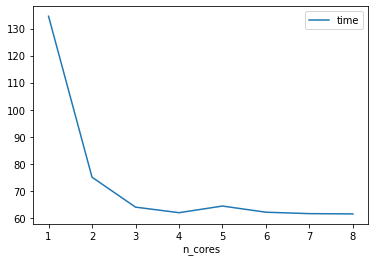

In [8]:
%time
df.plot.line('n_cores', 'time')